In [1]:
import sys, os
import serial
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import win32com.client
from astropy.io import fits
import threading
import nbimporter
from picoammeter_control import (
    send_cmd,
    query,
    init_cmds
)
from camera_control_ascom import (
    take_ramp,
    camera_init
)
sys.path.insert(0, os.path.abspath('.'))
sys.path.insert(0, os.path.abspath('filter_wheel_control'))
from filter_wheel_control.wheel_controller import (
    list_devices,
    open_device,
    get_position,
    get_position_count,
    set_position,
    close_device
)
from data_helper_functions import (
    init_wheels,
    close_wheels,
    camera_init,
    picoam_stability,
    picoam_worker_exp,
    camera_with_picoam,
    collect_var_exp,
    var_exp_graphs,
    capture_frame,
    calculate_gain,
    get_gain,
    picoam_worker_filters,
    camera_with_filters,
    collect_var_filters,
    compare_exp_and_filter,
    collect_bias_frames
)

In [2]:
init_wheels(print_stuff=True)
close_wheels()


Finding filter wheel devices...
Found devices:
 [0] COM5
 [1] COM7
 [2] COM4
-1
6
12


In [3]:
camera_init()
cam_name = "ASCOM.ASICamera2.Camera"
save_path= "C:/Users/Jonah/fits_imgs"


You selected: ASCOM.ASICamera2.Camera


In [4]:
e_per_adu = get_gain(cam_name=cam_name, num_frames=2, print_stuff=True)

starting calculation
flats collected
darks collected
Measured: 0.02441 e-/ADU on mode=300 gain
Flat mean: 508.4087976160034, Flat var: 3810.1
Dark mean: 501.2875441788882, Dark var: 3518.3



Camera connected: ASCOM.ASICamera2.Camera, Size: 6248x4176, Temperature: 0.00C
camera offset: 0
Taking frames at 0.00010000 seconds (exposure time 1/20)
Taking frames at 0.00017844 seconds (exposure time 2/20)
Taking frames at 0.00031839 seconds (exposure time 3/20)
Taking frames at 0.00056813 seconds (exposure time 4/20)
Taking frames at 0.00101374 seconds (exposure time 5/20)
Taking frames at 0.00180887 seconds (exposure time 6/20)
Taking frames at 0.00322768 seconds (exposure time 7/20)
Taking frames at 0.00575932 seconds (exposure time 8/20)
Taking frames at 0.01027669 seconds (exposure time 9/20)
Taking frames at 0.01833728 seconds (exposure time 10/20)
Taking frames at 0.03272024 seconds (exposure time 11/20)
Taking frames at 0.05838457 seconds (exposure time 12/20)
Taking frames at 0.10417889 seconds (exposure time 13/20)
Taking frames at 0.18589229 seconds (exposure time 14/20)
Taking frames at 0.33169813 seconds (exposure time 15/20)
Taking frames at 0.59186774 seconds (expos

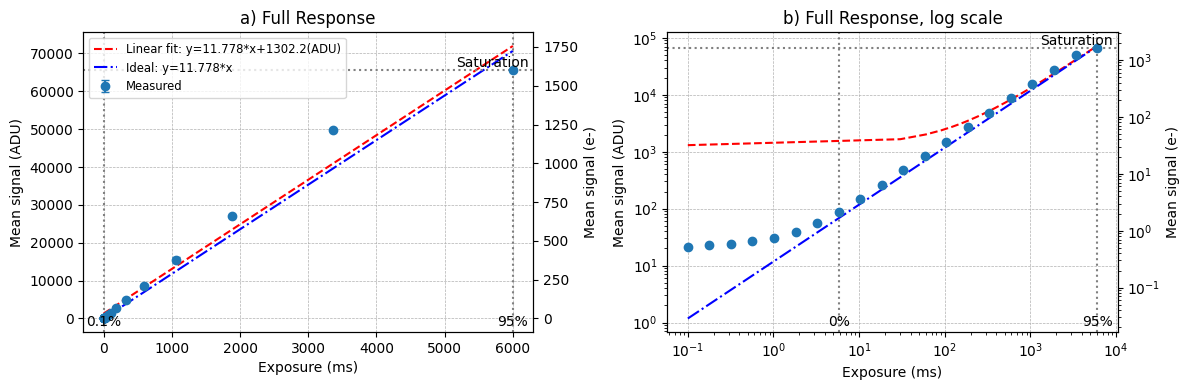

Figure saved to exp_0.0001-6.0_linearity_figure.png


In [5]:
I_flat, Q_ramp, mean_signal, std_signal, bit_depth, exp_times, exp_low, exp_high, exp_50 = (
    collect_var_exp(cam_name=cam_name, num_exp=20, num_frames=3, exp_low = 0.0001, exp_high = 6.0, save_path=save_path)
)

var_exp_graphs(mean_signal, std_signal, bit_depth, exp_times, exp_low, exp_high, save=True, e_per_adu=e_per_adu, min_percent=0.001)

In [6]:
signals_f, Q_filt = collect_var_filters(save_path = save_path, cam_name=cam_name, exp_50=exp_50, num_frames=2)

-1
6
12

starting filter 1
starting filter 2
starting filter 3
starting filter 4
starting filter 5
starting filter 6
Wrote per-frame filter data to C:/Users/Jonah/fits_imgs\filter_frame_data.csv
finished


In [7]:
bias_level = collect_bias_frames(cam_name = cam_name,num_frames=20, exp_low=0.0001, save_path=save_path)

Camera connected: ASCOM.ASICamera2.Camera, Size: 6248x4176, Temperature: 27.20C
camera offset: 0
Taking frames at 0.00010000 seconds (exposure time 1/1)
exp res: 0.00000100 seconds
Bias cube saved to C:/Users/Jonah/fits_imgs\bias_stack.fits
Bias means saved to C:/Users/Jonah/fits_imgs\bias_means.csv


In [9]:
compare_exp_and_filter(e_per_adu = e_per_adu, Q_ramp=Q_ramp, Q_filt=Q_filt, signals_f=signals_f, mean_signal=mean_signal, save=True)


None


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'